In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import joblib
from matplotlib.colors import ListedColormap

In [3]:
class Perceptron:
  def __init__(self, eta: float=None, epochs: int=None):
    self.weights = np.random.rand(3)*1e-4 ## initialising random weights before training
    training = (eta is not None) and (epochs is not None)
    if training:
      logging.info(f"Initial weights before Training:\n{self.weights}")
    self.eta = eta
    self.epochs = epochs

  def _ZOutcome_(self,X,w):
    return np.dot(X,w)

  def activation(self,z):
    return np.where(z>0,1,0)

  def fit(self,X,y):
    self.X =X
    self.y = y

  # To add bias to X
    X_with_bias = np.c_[self.X,-np.ones((len(self.X),1))]
    
    for epoch in range(self.epochs):
      logging.info(f"for epoch>> {epoch+1}")
      z = self._ZOutcome_(X_with_bias,self.weights)
      y_hat = self.activation(z)
      logging.info(f"Predicted value after Forward Pass: {y_hat}")

      # Error Calculation
      self.error = self.y - y_hat
      logging.info(f'Error:\n{self.error}')

      # Weight update
      self.weights = self.weights + self.eta* np.dot(X_with_bias.T,self.error)
      logging.info(f"Updated weights after {epoch+1}/{self.epochs}: {self.weights}")

  def predictFun(self,X):
    X_with_bias = np.c_[X,-np.ones((len(X),1))]
    z = self._ZOutcome_(X_with_bias,self.weights)
    return self.activation(z)
  
  def _create_dir(self,filename, model_dir):
    os.makedirs(model_dir, exist_ok=True)
    return os.path.join(model_dir,filename)

  def SaveModel(self,filename,model_dir=None):
    if model_dir:
      model_file_path = self._create_dir(filename,model_dir)
      joblib.dump(self,model_file_path)
    else:
      model_file_path = self._create_dir(filename,'model')
      joblib.dump(self,model_file_path)
  
  def loadModel_(self, filepath):
    return joblib.load(filepath)

In [65]:
def Data_prepare(df, target='y'):
  X = df.drop(target,axis=1)
  y = df[target]

  return X,y

In [93]:
# Model Training
AND = {
    'x1': [0,0,1,1],
    'x2': [0,1,0,1],
    'y': [0,0,0,1]
}

df_AND = pd.DataFrame(AND)
X,y = Data_prepare(df_AND)

eta = 0.1
EPOCHS = 10

In [94]:
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [95]:
y

0    0
1    0
2    0
3    1
Name: y, dtype: int64

In [96]:
model_AND = Perceptron(eta=eta, epochs=EPOCHS)
model_AND.fit(X,y)

Initial weights before Training:
[6.62185738e-05 9.61254620e-06 9.28124209e-05]
for epoch>> 1
Predicted value after Forward Pass: [0 0 0 0]
Error:
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights after 1/10: [ 0.10006622  0.10000961 -0.09990719]
for epoch>> 2
Predicted value after Forward Pass: [1 1 1 1]
Error:
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
Updated weights after 2/10: [6.62185738e-05 9.61254620e-06 2.00092812e-01]
for epoch>> 3
Predicted value after Forward Pass: [0 0 0 0]
Error:
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights after 3/10: [0.10006622 0.10000961 0.10009281]
for epoch>> 4
Predicted value after Forward Pass: [0 0 0 1]
Error:
0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after 4/10: [0.10006622 0.10000961 0.10009281]
for epoch>> 5
Predicted value after Forward Pass: [0 0 0 1]
Error:
0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after 5/10: [0.10006622 0.10000961 0.10009281]
for e

In [100]:
# Save,Load& Predict from model
model_AND.SaveModel(filename='model_AND')
loaded_model_AND = Perceptron().loadModel_(filepath='/content/model/model_AND')
loaded_model_AND.predictFun(X=[[1,1]])

array([1])

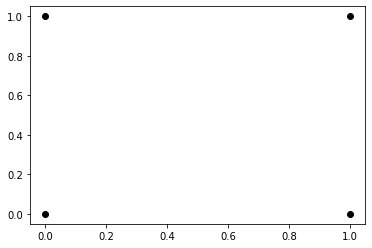

In [105]:
# Plotting Model_AND
plt.plot(X.x1,X.x2,'o',c=y)

In [110]:
def save_plot(df, model, filename="plot.png", plot_dir="plots"):
    def _create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10, 8)
    
    def _plot_decision_regions(X, y, classifier, resolution=0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        
        X = X.values # as an array
        x1 = X[:, 0]
        x2 = X[:, 1]
        
        x1_min, x1_max = x1.min() - 1, x1.max() + 1 
        x2_min, x2_max = x2.min() - 1, x2.max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution)
                              )
        y_hat = classifier.predictFun(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        plt.plot()
        
    X, y = Data_prepare(df)
    
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

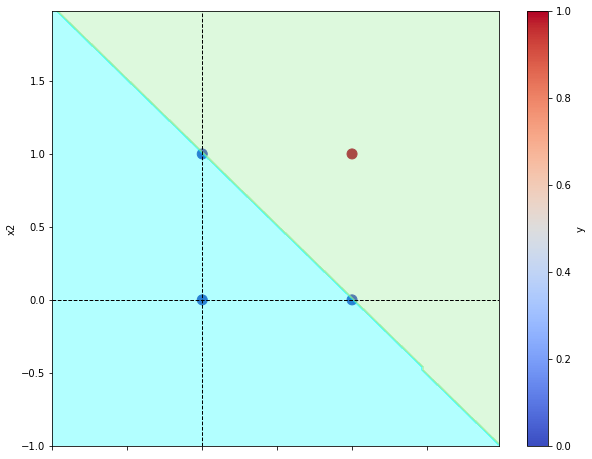

In [111]:
save_plot(df_AND,model_AND,filename='AND_plot.png')

# OR Gate Training

In [71]:
OR= {
    'x1':[0,0,1,1],
     'x2':[1,0,1,0],
     'y':[1,0,1,1]
}
df_OR = pd.DataFrame(OR)
X,y = Data_prepare(df_OR)

In [72]:
model_OR = Perceptron(eta=eta,epochs=EPOCHS)
model_OR.fit(X,y)

Initial weights before Training:
[8.73354765e-05 9.87852531e-05 8.56412131e-05]
for epoch>> 1
Predicted value after Forward Pass: [1 0 1 1]
Error:
0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after 1/10: [8.73354765e-05 9.87852531e-05 8.56412131e-05]
for epoch>> 2
Predicted value after Forward Pass: [1 0 1 1]
Error:
0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after 2/10: [8.73354765e-05 9.87852531e-05 8.56412131e-05]
for epoch>> 3
Predicted value after Forward Pass: [1 0 1 1]
Error:
0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after 3/10: [8.73354765e-05 9.87852531e-05 8.56412131e-05]
for epoch>> 4
Predicted value after Forward Pass: [1 0 1 1]
Error:
0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after 4/10: [8.73354765e-05 9.87852531e-05 8.56412131e-05]
for epoch>> 5
Predicted value after Forward Pass: [1 0 1 1]
Error:
0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after 5/10: [8.7335